# Exercises for Chapter 2

## Chapter 2, Exercise 1

### Calculation of PRN Codes

### Implement Linear Feedback Shift Register, PRN Generator, and List to Hex Helper Function

In [51]:
import numpy as np


class PrnCodeLfsr:

    def __init__(self, bit_length, tap_idxs, select_idxs=None):
        
        # Initialize all contents to 1
        self._contents = np.ones(bit_length, dtype=np.int8)

        # Set tap locations
        tap_vector = np.zeros(bit_length, dtype=np.int8)
        for i in range(len(tap_vector)):
            if i in tap_idxs:
                tap_vector[i] = 1
        self._taps = tap_vector

        # If select is used, set those locations
        if select_idxs:
            select_vector = np.zeros(bit_length, dtype=np.int8)
            for i in range(len(select_vector)):
                if i in select_idxs:
                    select_vector[i] = 1
                self._select_bits = select_vector
        else:
            self._select_bits = None

    def getChip(self):

        # Calculate new bit
        new_bit = np.int8(0)
        for idx, is_tap in enumerate(self._taps):
            if is_tap:
                new_bit = new_bit ^ self._contents[idx]
        
        # Shift the register
        chip_out = self._contents[-1]
        self._contents = np.concatenate((np.array([new_bit]), self._contents[:-1]))

        # Get the output chip
        return chip_out

    def getPhaseSelectorOutput(self):
        phase_sel_output = 0
        for idx, is_select in enumerate(self._select_bits):
            if is_select:
                phase_sel_output = phase_sel_output ^ self._contents[idx]
        return phase_sel_output


class PrnGenerator:

    def __init__(self, select_idxs=None):
        self._g1_generator = PrnCodeLfsr(bit_length=10, tap_idxs=(2, 9))
        self._g2_generator = PrnCodeLfsr(
            bit_length=10,
            tap_idxs=(1, 2, 5, 7, 8, 9),
            select_idxs=select_idxs
        )

    def getEpochOutput(self):
        g1_chip = self._g1_generator.getChip()
        g2i_bit = self._g2_generator.getPhaseSelectorOutput()
        xgi_chip = g1_chip ^ g2i_bit
        g2_chip = self._g2_generator.getChip()
        return {'G1': g1_chip, 'XGi': xgi_chip, 'G2': g2_chip}
    

def binary_list_to_hex(binary_list):
    if len(binary_list) != 4:
        raise(ValueError('Binary list must contain exactly four bits'))
    int_value = (
        binary_list[0]*8 +
        binary_list[1]*4 +
        binary_list[2]*2 +
        binary_list[3]*1
    )
    return f'{int_value:x}'


### A. Calculate the 1023-chip C/A code for PRN19. Plot the first 16 and last 16 chips of the code.

PRN 19 first 16 bits in hexadecimal: e6d6


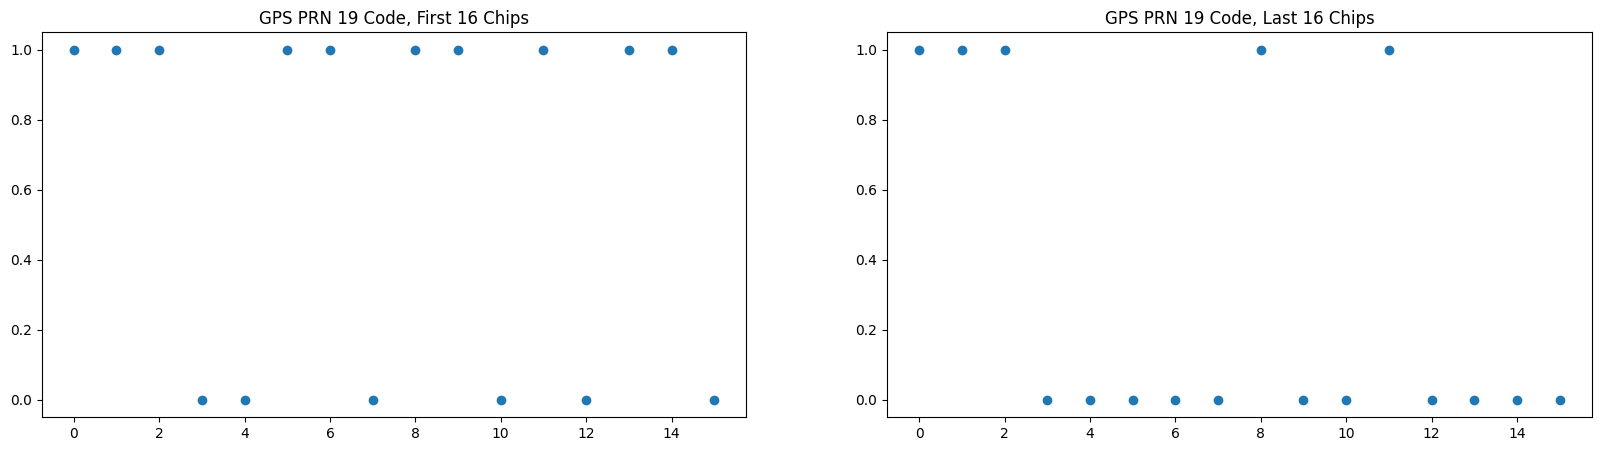

In [52]:
import matplotlib.pyplot as plt

# Instantiate the generator
prn19_generator = PrnGenerator(select_idxs=(2,5))

# Specify the code length
CODE_LENGTH = 1023

# Run the PRN generator and get the C/A code
prn19_ca_chips = np.zeros(CODE_LENGTH, dtype=np.int8)
for i in range(CODE_LENGTH):
    code_output = prn19_generator.getEpochOutput()
    prn19_ca_chips[i] = code_output['XGi']

# Plot the first and last sets of 16 chips
fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].plot(prn19_ca_chips[:16], marker='o', linestyle='none')
axs[0].set_title('GPS PRN 19 Code, First 16 Chips')
axs[1].plot(prn19_ca_chips[-16:], marker='o', linestyle='none')
axs[1].set_title('GPS PRN 19 Code, Last 16 Chips')

# Print the first 16 chips in hexadecimal format
hex_string = ''
for i in range(4):
    hex_string += binary_list_to_hex(prn19_ca_chips[4*i:4*(i+1)])
print(f'PRN 19 first 16 bits in hexadecimal: {hex_string}')


### B. Calculate the 1024th through 2046th chips of the C/A code for PRN19. Compare to the first 1023 chips.

In [53]:
# Run the PRN generator and get the next 1023 chips
prn19_ca_chips_set_2 = np.zeros(CODE_LENGTH, dtype=np.int8)
for i in range(CODE_LENGTH):
    code_output = prn19_generator.getEpochOutput()
    prn19_ca_chips_set_2[i] = code_output['XGi']

# Determine the number of different chips between the two sets
num_chip_differences = 0
for i in range(CODE_LENGTH):
    if prn19_ca_chips_set_2[i] != prn19_ca_chips[i]:
        num_chip_differences += 1
print(f'There are {num_chip_differences} differences between the first 1023 chips of the C/A code and the second 1023 chips of the code.')

There are 0 differences between the first 1023 chips of the C/A code and the second 1023 chips of the code.


### C. Repeat part A for PRN25.

PRN 25 first 16 bits in hexadecimal: f8f4


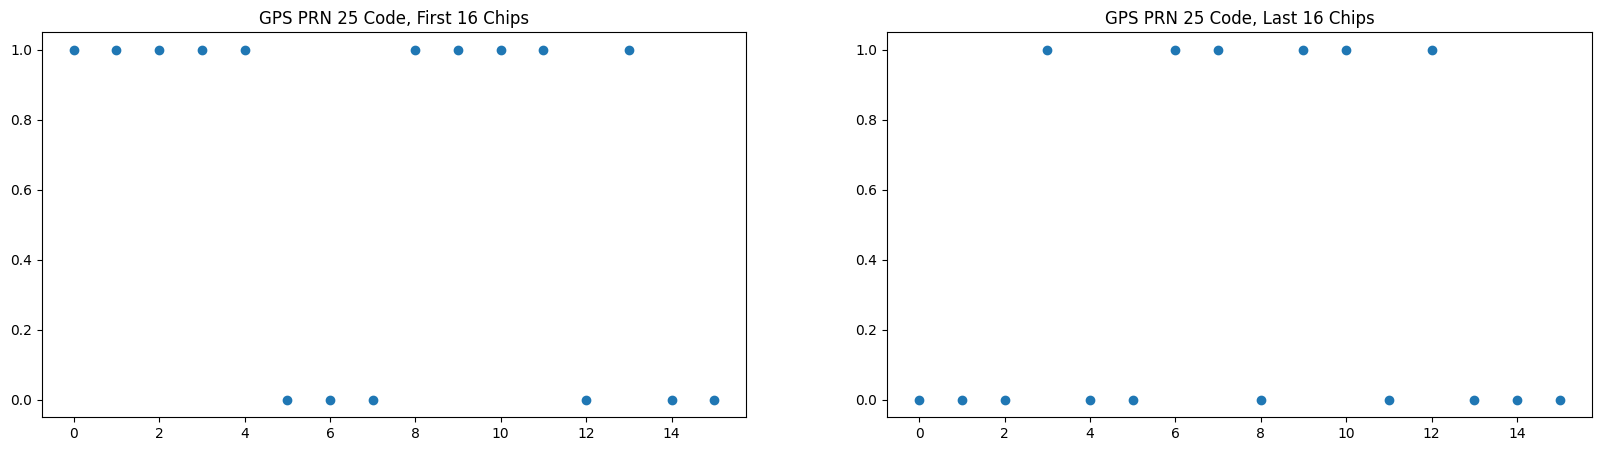

In [54]:
# Instantiate the generator
prn25_generator = PrnGenerator(select_idxs=(4,6))

# Specify the code length
CODE_LENGTH = 1023

# Run the PRN generator and get the C/A code
prn25_ca_chips = np.zeros(CODE_LENGTH, dtype=np.int8)
for i in range(CODE_LENGTH):
    code_output = prn25_generator.getEpochOutput()
    prn25_ca_chips[i] = code_output['XGi']

# Plot the first and last sets of 16 chips
fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].plot(prn25_ca_chips[:16], marker='o', linestyle='none')
axs[0].set_title('GPS PRN 25 Code, First 16 Chips')
axs[1].plot(prn25_ca_chips[-16:], marker='o', linestyle='none')
axs[1].set_title('GPS PRN 25 Code, Last 16 Chips')

# Print the first 16 chips in hexadecimal format
hex_string = ''
for i in range(4):
    hex_string += binary_list_to_hex(prn25_ca_chips[4*i:4*(i+1)])
print(f'PRN 25 first 16 bits in hexadecimal: {hex_string}')

### D. Repeat part A for PRN5.

PRN 5 first 16 bits in hexadecimal: 96c4


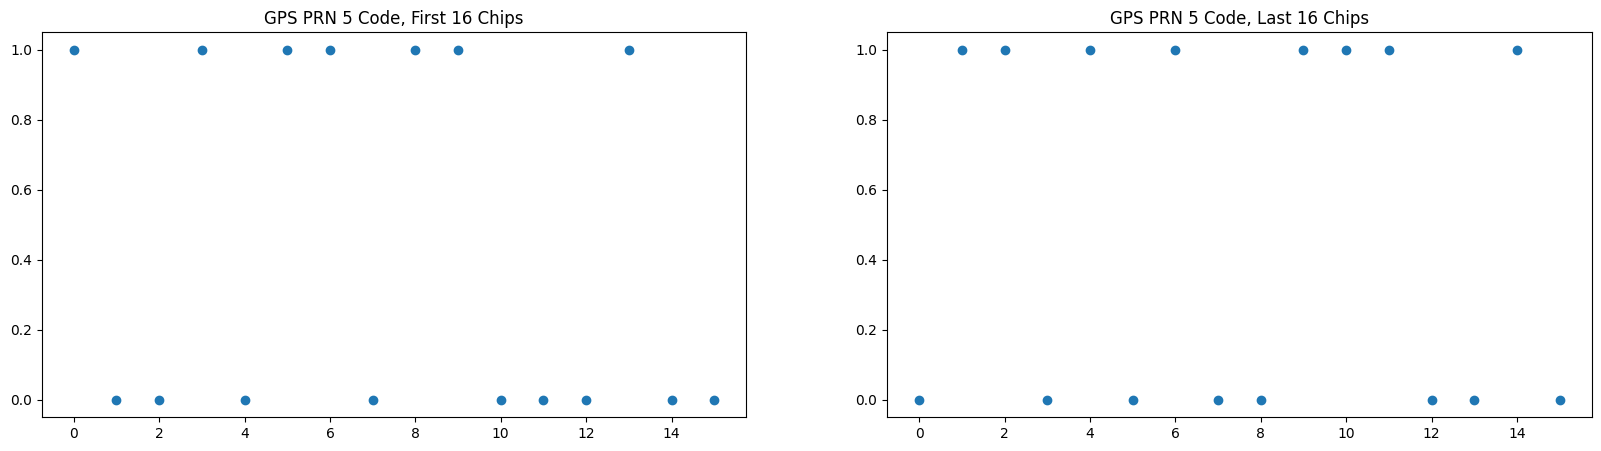

In [55]:
# Instantiate the generator
prn5_generator = PrnGenerator(select_idxs=(0,8))

# Specify the code length
CODE_LENGTH = 1023

# Run the PRN generator and get the C/A code
prn5_ca_chips = np.zeros(CODE_LENGTH, dtype=np.int8)
for i in range(CODE_LENGTH):
    code_output = prn5_generator.getEpochOutput()
    prn5_ca_chips[i] = code_output['XGi']

# Plot the first and last sets of 16 chips
fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].plot(prn5_ca_chips[:16], marker='o', linestyle='none')
axs[0].set_title('GPS PRN 5 Code, First 16 Chips')
axs[1].plot(prn5_ca_chips[-16:], marker='o', linestyle='none')
axs[1].set_title('GPS PRN 5 Code, Last 16 Chips')

# Print the first 16 chips in hexadecimal format
hex_string = ''
for i in range(4):
    hex_string += binary_list_to_hex(prn5_ca_chips[4*i:4*(i+1)])
print(f'PRN 5 first 16 bits in hexadecimal: {hex_string}')

## Chapter 2, Exercise 2

### PRN Code Correlation

### Convert the C/A codes obtained previously to a binary antipodal symbol set (0 mapped to 1, 1 mapped to -1)

In [56]:
# Convert PRN19 code
prn19_ca_chips[prn19_ca_chips == 1] = -1
prn19_ca_chips[prn19_ca_chips == 0] = 1

# Convert PRN25 code
prn25_ca_chips[prn25_ca_chips == 1] = -1
prn25_ca_chips[prn25_ca_chips == 0] = 1

# Convert PRN5 code
prn5_ca_chips[prn5_ca_chips == 1] = -1
prn5_ca_chips[prn5_ca_chips == 0] = 1

### A. Plot the autocorrelation function of PRN19

Text(0.5, 1.0, 'GPS PRN 19 Code Autocorrelation')

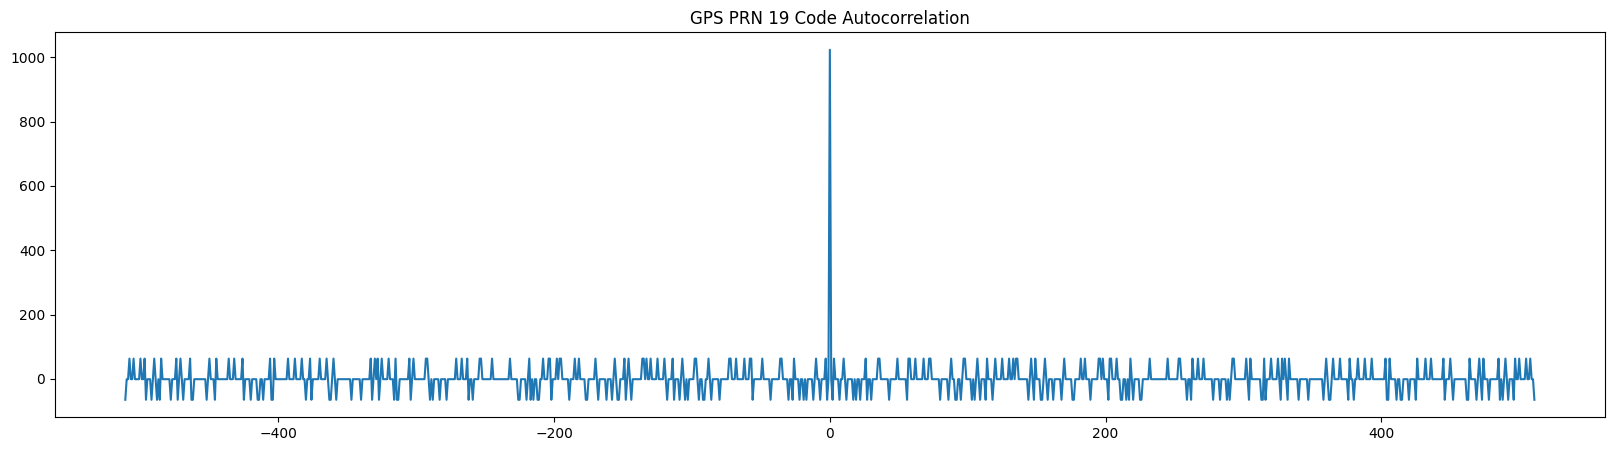

In [57]:
# Define shifting axis and autocorrelation function
shift_axis = np.linspace(start=-511, stop=511, num=1023, dtype=np.int32)

def get_autocorrelation(shift_axis, sequence):
    autocorrelation = np.zeros(len(shift_axis))
    for i, shift in enumerate(shift_axis):
        autocorrelation[i] = np.multiply(sequence, np.roll(sequence, shift)).sum()
    return autocorrelation

# Plot the autocorrelation function
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_autocorrelation(shift_axis, prn19_ca_chips))
ax.set_title('GPS PRN 19 Code Autocorrelation')

### B. Plot the cross-correlation of the PRN19 code and a 200-chip delayed copy

Text(0.5, 1.0, 'GPS PRN 19 Code Cross-Correlation With 200-Chip Delayed Copy')

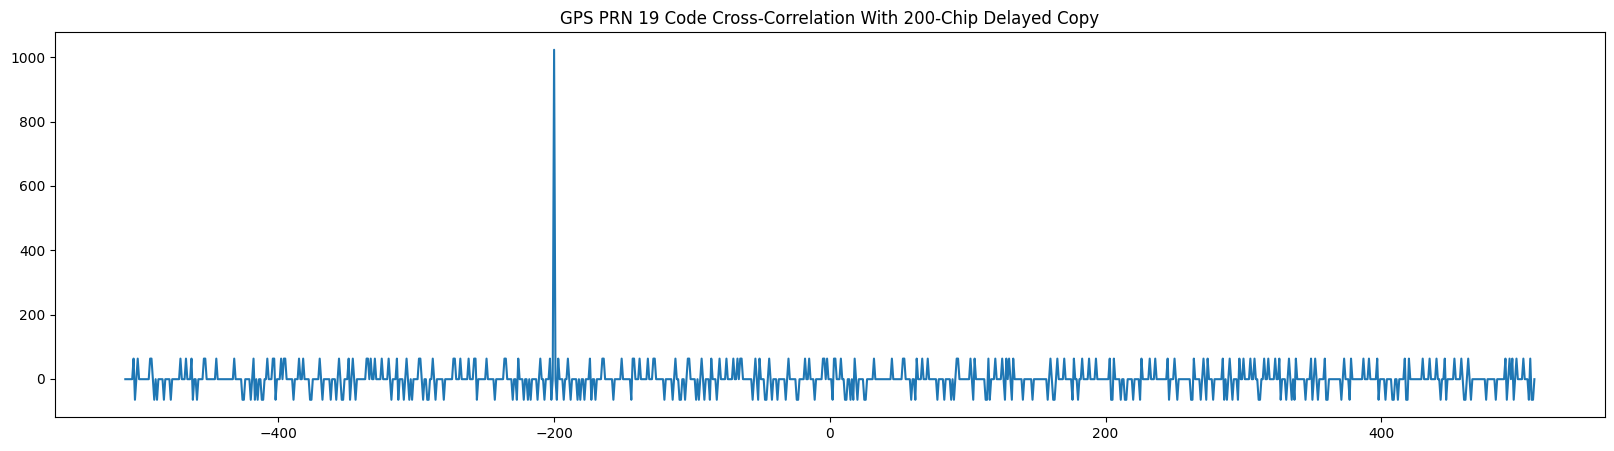

In [58]:
# Define a cross-correlation function
def get_cross_correlation(shift_axis, sequence1, sequence2):
    cross_correlation = np.zeros(len(shift_axis))
    for i, shift in enumerate(shift_axis):
        cross_correlation[i] = np.multiply(sequence1, np.roll(sequence2, shift)).sum()
    return cross_correlation

# Create the delayed copy of the PRN code
NUM_DELAY_CHIPS = 200
prn19_ca_chips_delayed = np.roll(prn19_ca_chips, NUM_DELAY_CHIPS)

# Plot the cross-correlation
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_cross_correlation(shift_axis, prn19_ca_chips, prn19_ca_chips_delayed))
ax.set_title(f'GPS PRN 19 Code Cross-Correlation With {NUM_DELAY_CHIPS}-Chip Delayed Copy')

Because the delayed copy has the code start 200 cycles late, we expect to see the autocorrelation peak appear when we shift it 200 cycles forward.

### C. Plot the cross-correlation of the PRN19 code and the PRN 25 code

(-60.0, 1023.0)

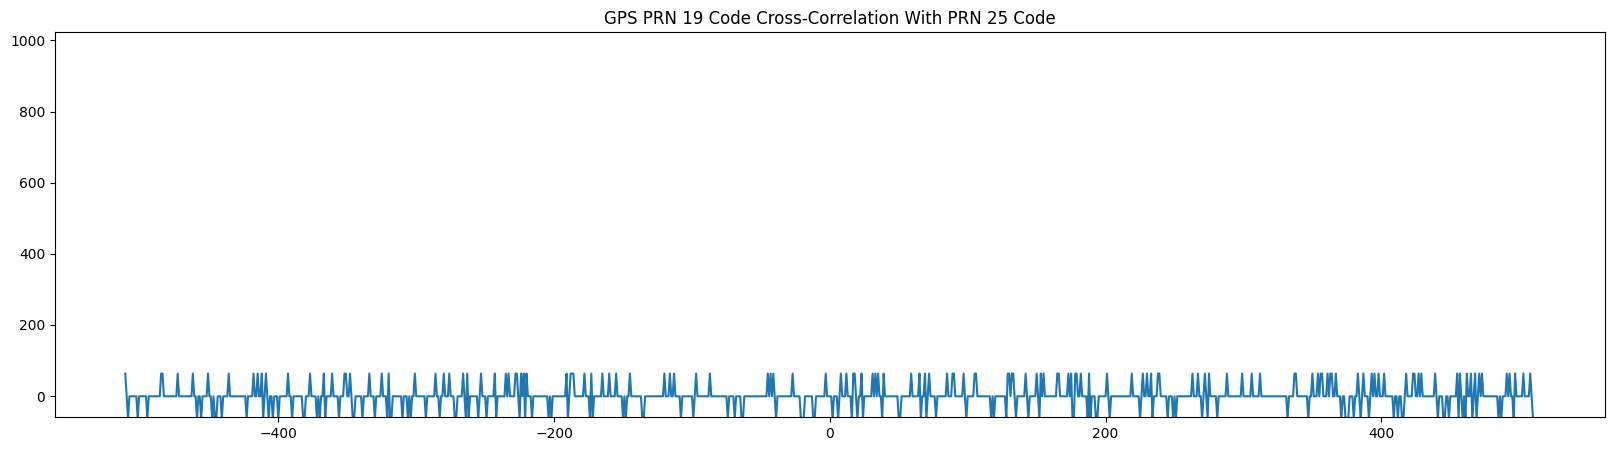

In [59]:
# Plot the cross-correlation
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_cross_correlation(shift_axis, prn19_ca_chips, prn25_ca_chips))
ax.set_title(f'GPS PRN 19 Code Cross-Correlation With PRN 25 Code')
ax.set_ylim(bottom=-60, top=1023)

There is no peak in this chart, and the cross-correlation is always small. This is indicative of the codes' orthogonality.

### D. Plot the cross-correlation of the PRN19 code and the PRN 5 code

(-60.0, 1023.0)

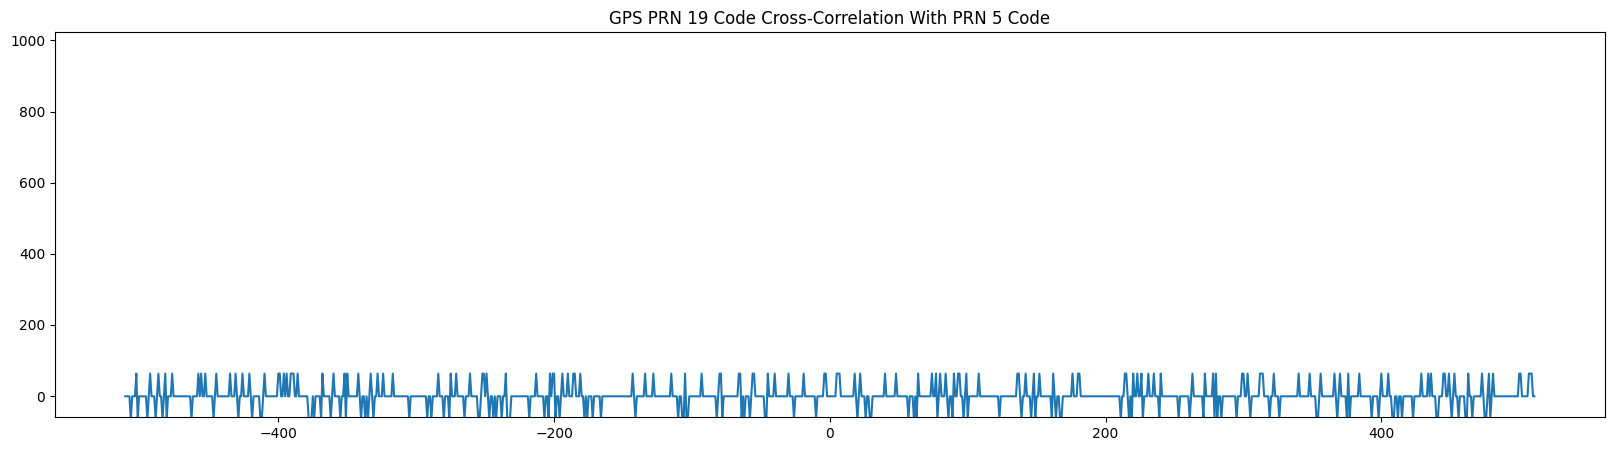

In [60]:
# Plot the cross-correlation
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_cross_correlation(shift_axis, prn19_ca_chips, prn5_ca_chips))
ax.set_title(f'GPS PRN 19 Code Cross-Correlation With PRN 5 Code')
ax.set_ylim(bottom=-60, top=1023)

This looks similar to the plot from part C, and this is expected; all PRN codes are designed to be orthogonal.

### E. Cross-correlation of PRN 19 with summed shifted PRN codes

Text(0.5, 1.0, 'GPS PRN 19 Code Cross-Correlation With Combined Code Test Signal')

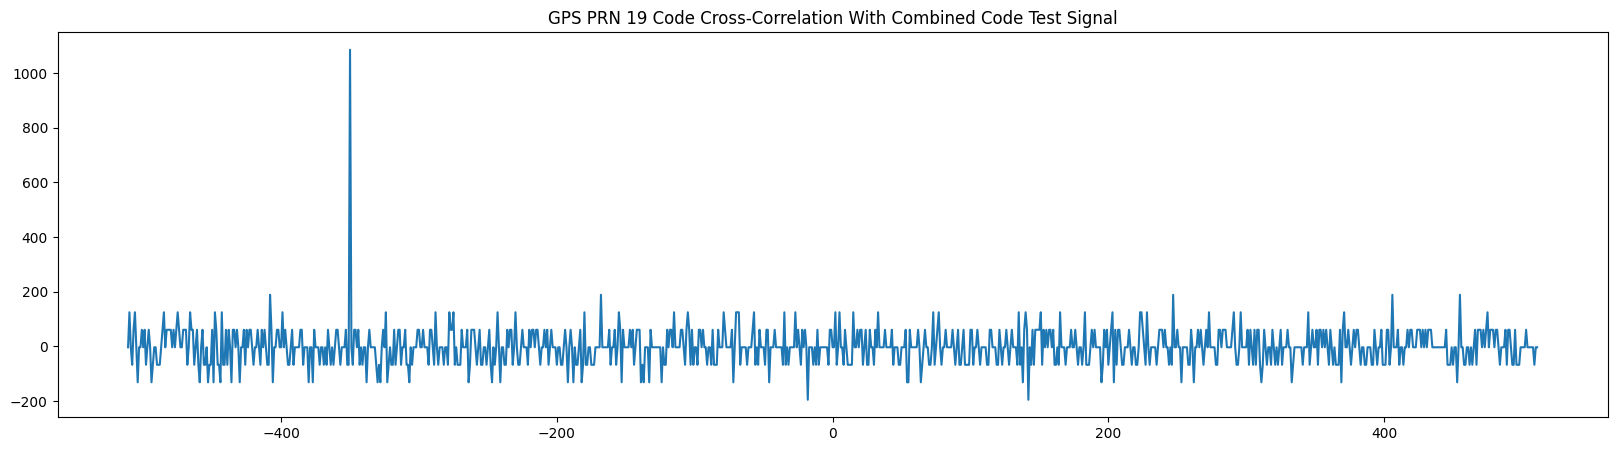

In [61]:
# Create the three test signals

# x1: PRN 19 delayed by 350 chips
x1 = np.roll(prn19_ca_chips, 350)

# x2: PRN 25 delayed by 905 chips
x2 = np.roll(prn25_ca_chips, 905)

# x3: PRN 5 delayed by 75 chips
x3 = np.roll(prn5_ca_chips, 75)

# Test signal
prn_sum_test = x1 + x2 + x3

# Plot the cross-correlation
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_cross_correlation(shift_axis, prn19_ca_chips, prn_sum_test))
ax.set_title(f'GPS PRN 19 Code Cross-Correlation With Combined Code Test Signal')

As expected, the PRN 19 peak appears when we undo the 350-chip delay, and the other codes contribute nothing noticeable due to orthogonality.

### F. Create a noise vector and plot it alongside the shifted PRN codes

Text(0.5, 1.0, 'PRN 5, 95 Chip Delay')

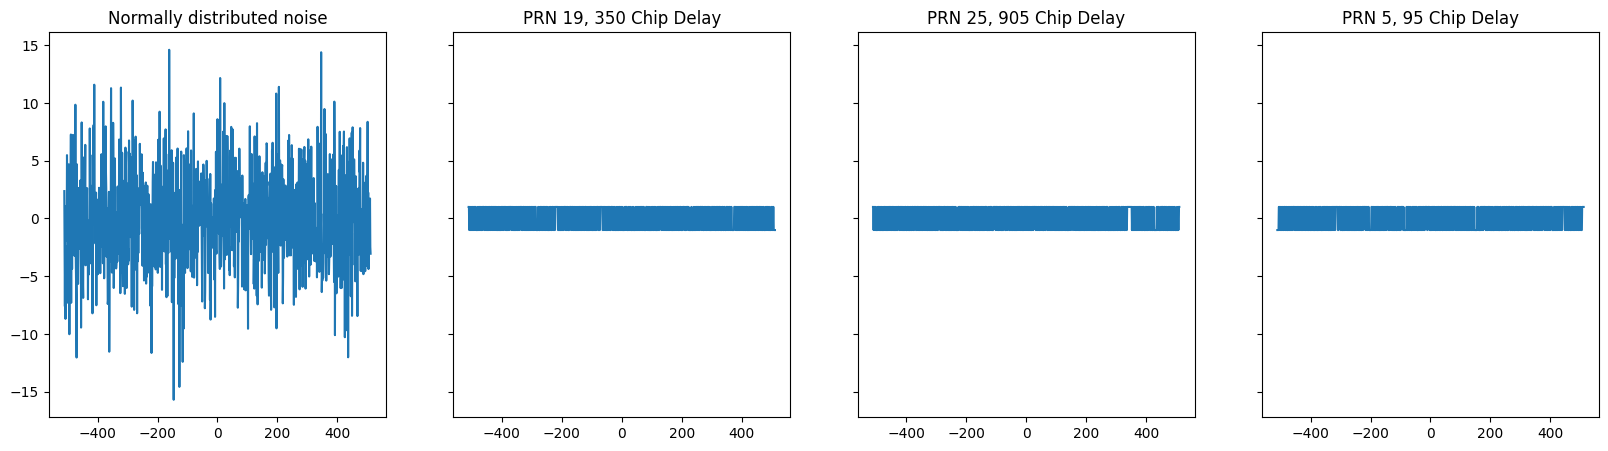

In [62]:
# Create the noise vector
noise = np.random.normal(loc=0.0, scale=4.0, size=(CODE_LENGTH))

# Plot the noise and the three codes
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 5))
axs[0].plot(shift_axis, noise)
axs[0].set_title('Normally distributed noise')
axs[1].plot(shift_axis, x1)
axs[1].set_title('PRN 19, 350 Chip Delay')
axs[2].plot(shift_axis, x2)
axs[2].set_title('PRN 25, 905 Chip Delay')
axs[3].plot(shift_axis, x3)
axs[3].set_title('PRN 5, 95 Chip Delay')

### G. Cross-correlate to retrieve PRN 19 from the signals combined with the noise

Text(0.5, 1.0, 'GPS PRN 19 Code Cross-Correlation With Noisy Test Signal')

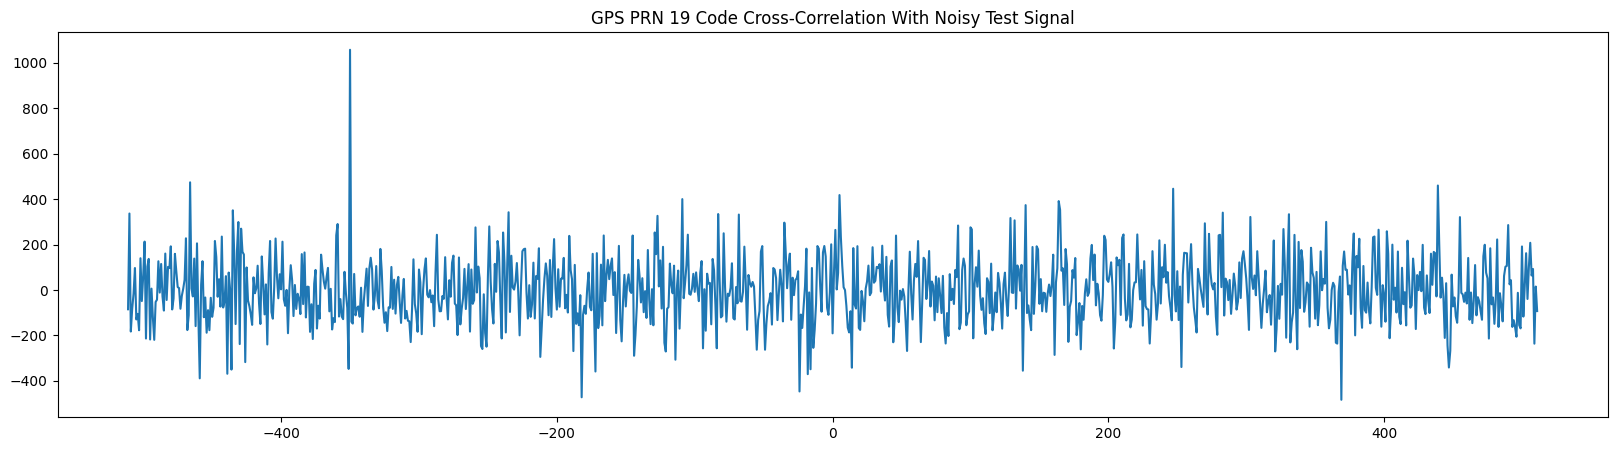

In [63]:
# Create the test signal
noise_prn_test_signal = x1 + x2 + x3 + noise

# Plot the cross-correlation
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(shift_axis, get_cross_correlation(shift_axis, prn19_ca_chips, noise_prn_test_signal))
ax.set_title(f'GPS PRN 19 Code Cross-Correlation With Noisy Test Signal')

The peak appears where we expect, where the 350-chip delay on the PRN 19 signal is undone. The orthogonality of the other codes has been demonstrated before, and the random noise understandably exhibits no cross-correlation contributions. The ability to "dig" the signal out makes sense given the vastly greater magnitude of the autocorrelation of a long code compared to the likely results of correlating with random noise.